In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd 
df_img = pd.read_pickle("/content/gdrive/MyDrive/TICNN_Implementation/TICNN/final_text_df.pkl")

In [ ]:
import numpy as np

In [ ]:
Y=df_img['type']
X=df_img.loc[ : , df_img.columns != 'type']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_comb, y_train, y_comb = train_test_split(X, Y, test_size=0.2,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_comb, y_comb, test_size=0.5,random_state=42)

In [ ]:
X_train_text_latent=X_train.loc[:, ['text']]
X_train_text_explicit=X_train.loc[:, ['caps_title', 'caps_thread',
       'caps_text', 'title_len', 'thread_len', 'text_len', 'excl_title',
       'excl_thread', 'excl_text', 'first_title', 'first_thread', 'first_text',
       'second_title', 'second_thread', 'second_text', 'third_title',
       'third_thread', 'third_text', 'anger', 'anticipation', 'disgust',
       'fear', 'joy', 'sadness', 'surprise', 'trust', 'negative', 'positive',
       'first_all', 'second_all', 'third_all']]
X_test_text_latent=X_test.loc[:, ['text']]
X_test_text_explicit=X_test.loc[:, ['caps_title', 'caps_thread',
       'caps_text', 'title_len', 'thread_len', 'text_len', 'excl_title',
       'excl_thread', 'excl_text', 'first_title', 'first_thread', 'first_text',
       'second_title', 'second_thread', 'second_text', 'third_title',
       'third_thread', 'third_text', 'anger', 'anticipation', 'disgust',
       'fear', 'joy', 'sadness', 'surprise', 'trust', 'negative', 'positive',
       'first_all', 'second_all', 'third_all']]
X_val_text_latent=X_val.loc[:, ['text']]
X_val_text_explicit=X_val.loc[:, ['caps_title', 'caps_thread',
       'caps_text', 'title_len', 'thread_len', 'text_len', 'excl_title',
       'excl_thread', 'excl_text', 'first_title', 'first_thread', 'first_text',
       'second_title', 'second_thread', 'second_text', 'third_title',
       'third_thread', 'third_text', 'anger', 'anticipation', 'disgust',
       'fear', 'joy', 'sadness', 'surprise', 'trust', 'negative', 'positive',
       'first_all', 'second_all', 'third_all']]

In [ ]:
text_latent=[]
text_latent=np.array(X_train_text_latent['text'][17346]).reshape(-1,1000)
count=0
for i,row in X_train_text_latent.iterrows():
  if(count>0):
    text_latent=np.vstack([text_latent,np.array(row['text']).reshape(-1,1000)])
  count=count+1

In [ ]:
text_latent.shape

(16012, 1000)

In [ ]:
text_test_latent=[]
text_test_latent=np.array(X_test_text_latent['text'][18078]).reshape(-1,1000)
count=0
for i,row in X_test_text_latent.iterrows():
  if(count>0):
    text_test_latent=np.vstack([text_test_latent,np.array(row['text']).reshape(-1,1000)])
  count=count+1

In [ ]:
text_test_latent.shape

(2002, 1000)

In [ ]:
text_val_latent=[]
text_val_latent=np.array(X_val_text_latent['text'][4438]).reshape(-1,1000)
count=0
for i,row in X_val_text_latent.iterrows():
  if(count>0):
    text_val_latent=np.vstack([text_val_latent,np.array(row['text']).reshape(-1,1000)])
  count=count+1

In [ ]:
text_val_latent.shape

(2001, 1000)

In [ ]:
X_train_text_explicit=np.asarray(X_train_text_explicit).astype(np.float32)

In [ ]:
X_test_text_explicit=np.asarray(X_test_text_explicit).astype(np.float32)

In [ ]:
X_val_text_explicit=np.asarray(X_val_text_explicit).astype(np.float32)

In [ ]:
y_train_cp=np.asarray(y_train).astype(np.float32)
y_test_cp=np.asarray(y_test).astype(np.float32)


In [ ]:
y_val_cp=np.asarray(y_val).astype(np.float32)

In [ ]:
from pathlib import Path
import numpy as np
from keras.preprocessing.text import Tokenizer

def load_glove(url):
    f = open(url.absolute())
    embeddings_index = dict()
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        embeddings_index[word] = coefs
    f.close()
    return embeddings_index

GLOVE_URL = Path("/content/gdrive/MyDrive/TICNN_Implementation/TICNN/glove.6B.100d.txt")
glove = load_glove(GLOVE_URL)
t = Tokenizer()
t.fit_on_texts(glove.keys())
vocab_size = len(t.word_index) + 1

In [ ]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in t.word_index.items():
    embedding_vector = glove.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,ReLU,BatchNormalization,Dropout,Embedding,Conv1D,Conv2D,MaxPooling1D,MaxPooling2D,Flatten
import numpy as np

In [ ]:
#text branch
#Explicit features
model_text_explicit = Sequential()
model_text_explicit.add(Dense(128, input_dim=31))
model_text_explicit.add(BatchNormalization())
model_text_explicit.add(ReLU())

model_text_explicit.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 128)               4096      
_________________________________________________________________
batch_normalization_13 (Batc (None, 128)               512       
_________________________________________________________________
re_lu_16 (ReLU)              (None, 128)               0         
Total params: 4,608
Trainable params: 4,352
Non-trainable params: 256
_________________________________________________________________


In [ ]:
model_text_latent = Sequential()
model_text_latent.add(Embedding(vocab_size,100,weights=[embedding_matrix],input_length=1000,trainable=False))    #1000 is length of sentence and 100 is embedding dimension as glove100 used
model_text_latent.add(Dropout(0.5))
model_text_latent.add(Conv1D(10,3))
model_text_latent.add(MaxPooling1D(pool_size=2))
model_text_latent.add(Flatten())
model_text_latent.add(Dense(128))
model_text_latent.add(BatchNormalization())
model_text_latent.add(ReLU())
model_text_latent.add(Dropout(0.8))

model_text_latent.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 100)         33925200  
_________________________________________________________________
dropout_5 (Dropout)          (None, 1000, 100)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 998, 10)           3010      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 499, 10)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4990)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               638848    
_________________________________________________________________
batch_normalization_14 (Batc (None, 128)              

In [ ]:
from keras.layers import concatenate,Add
from keras.models import Model
merged_text = Add()([model_text_explicit.output,model_text_latent.output])

z  = ReLU()(merged_text)
z  = Dense(128)(z)
z =  BatchNormalization()(z)
z = Dense(1, activation='sigmoid')(z)
# our model will accept the inputs of the two branches and
# then output a single value
final_model_text = Model(inputs=[model_text_explicit.input,model_text_latent.input], outputs=z)

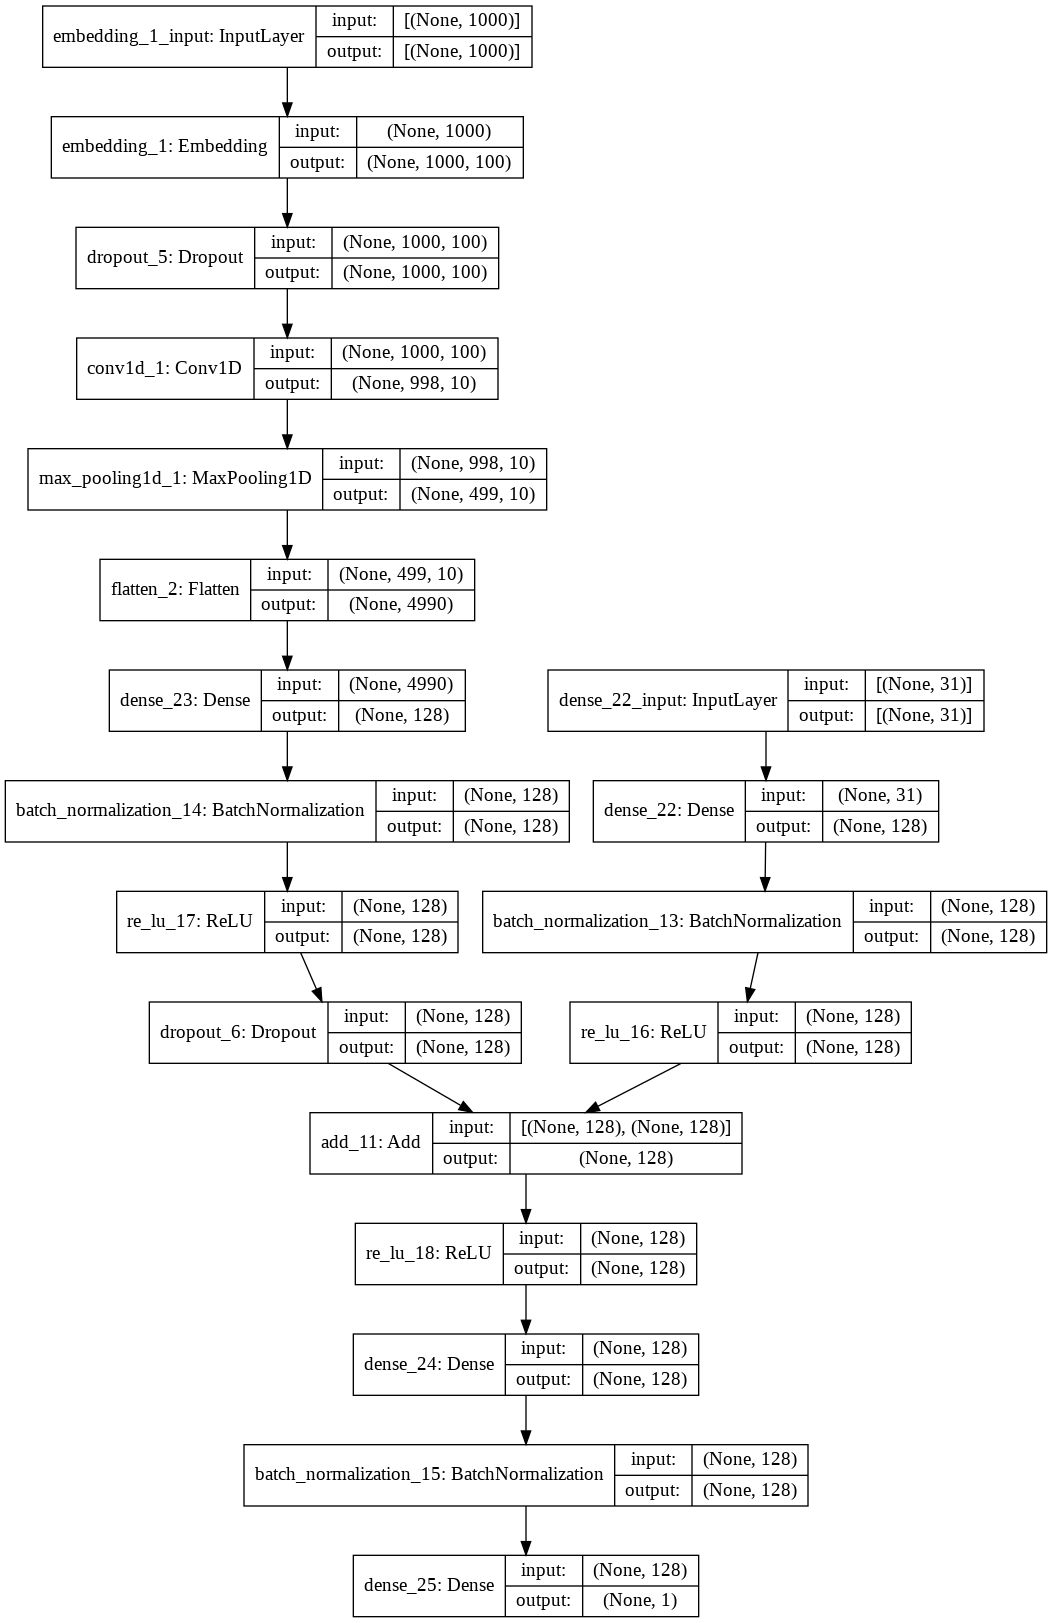

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(final_model_text,show_shapes=True, show_layer_names=True)

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
opt = Adam(lr=1e-3, decay=1e-3 / 200)
final_model_text.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8,restore_best_weights=True)
history=final_model_text.fit(
  x=[ X_train_text_explicit,text_latent], y=y_train.values,
	validation_data=([X_val_text_explicit,text_val_latent],y_val.values),callbacks=[es],
	epochs=40, batch_size=32)

Epoch 1/40
501/501 [==============================] - 5s 8ms/step - loss: 0.5950 - accuracy: 0.6942 - val_loss: 0.5258 - val_accuracy: 0.7501
Epoch 2/40
501/501 [==============================] - 4s 8ms/step - loss: 0.3702 - accuracy: 0.8477 - val_loss: 0.2727 - val_accuracy: 0.8891
Epoch 3/40
501/501 [==============================] - 4s 8ms/step - loss: 0.2940 - accuracy: 0.8774 - val_loss: 0.2363 - val_accuracy: 0.9115
Epoch 4/40
501/501 [==============================] - 4s 8ms/step - loss: 0.2738 - accuracy: 0.8907 - val_loss: 0.3763 - val_accuracy: 0.8581
Epoch 5/40
501/501 [==============================] - 4s 8ms/step - loss: 0.2223 - accuracy: 0.9141 - val_loss: 0.2138 - val_accuracy: 0.9170
Epoch 6/40
501/501 [==============================] - 4s 8ms/step - loss: 0.2238 - accuracy: 0.9134 - val_loss: 0.2255 - val_accuracy: 0.9190
Epoch 7/40
501/501 [==============================] - 4s 8ms/step - loss: 0.2048 - accuracy: 0.9201 - val_loss: 0.1822 - val_accuracy: 0.9300
Epoch 

In [ ]:
y_pred_text=final_model_text.predict([X_test_text_explicit,text_test_latent])

In [ ]:
y_pred_text = (y_pred_text>=0.5)*1

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
precision = precision_score(y_test.values, y_pred_text)
# recall: tp / (tp + fn)
recall = recall_score(y_test.values,y_pred_text)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test.values, y_pred_text)
print('Precision is:'+str(precision))
print('Recall is:'+str(recall))
print('F1 score is:'+str(f1))
print('Accuracy is:'+str(accuracy_score(y_test.values,y_pred_text)))

Precision is:0.9589270746018441
Recall is:0.9509559434746467
F1 score is:0.9549248747913189
Accuracy is:0.9460539460539461


In [ ]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test.values, y_pred_text)

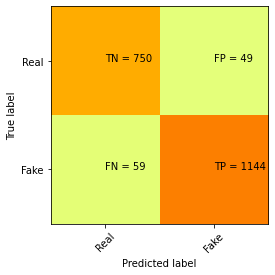

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Real','Fake']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [ ]:
model_json =final_model_text.to_json()
with open("final_model_text.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
final_model_text.save_weights("final_model_text.h5")
print("Saved model to disk")

Saved model to disk
